# Numerical Integration: 2 Methods

## Trapezoidal Rule

$$ \int_a^b f(x)dx \approx \frac{\Delta x}{2} (f(x_0) + 2f(x_1) + 2f(x_2) + \ldots + 2f(x_{N-1}) + f(x_N))$$
(from Wikipedia: Trapezoidal Rule)

In [1]:
import numpy as np

def integrate_trapezoidal_rule(f, a, b, n):
    delt_x = (b - a) / n # compute the sub-interval width

    X = np.linspace(a, b, n) # generate N equally-spaced values between a and b, inclusive
    
    # compute the integral
    integral = (delt_x / 2) * (f(X[0]) + 2 * np.sum(f(X[1:-1])) + f(X[n-1]))
    
    return integral

$$ f(x)=x^3+\frac{x}{2}+5 $$
$$ \int_{-1}^4 f(x)dx = 92.5 $$

In [10]:
def f(x):
    return x**3 + x / 2 + 5

print(integrate_trapezoidal_rule(f, -1, 4, 10))
print(integrate_trapezoidal_rule(f, -1, 4, 100))
print(integrate_trapezoidal_rule(f, -1, 4, 1000))

84.29166666666667
91.58446969696969
92.40759384384384


<IPython.core.display.Javascript object>


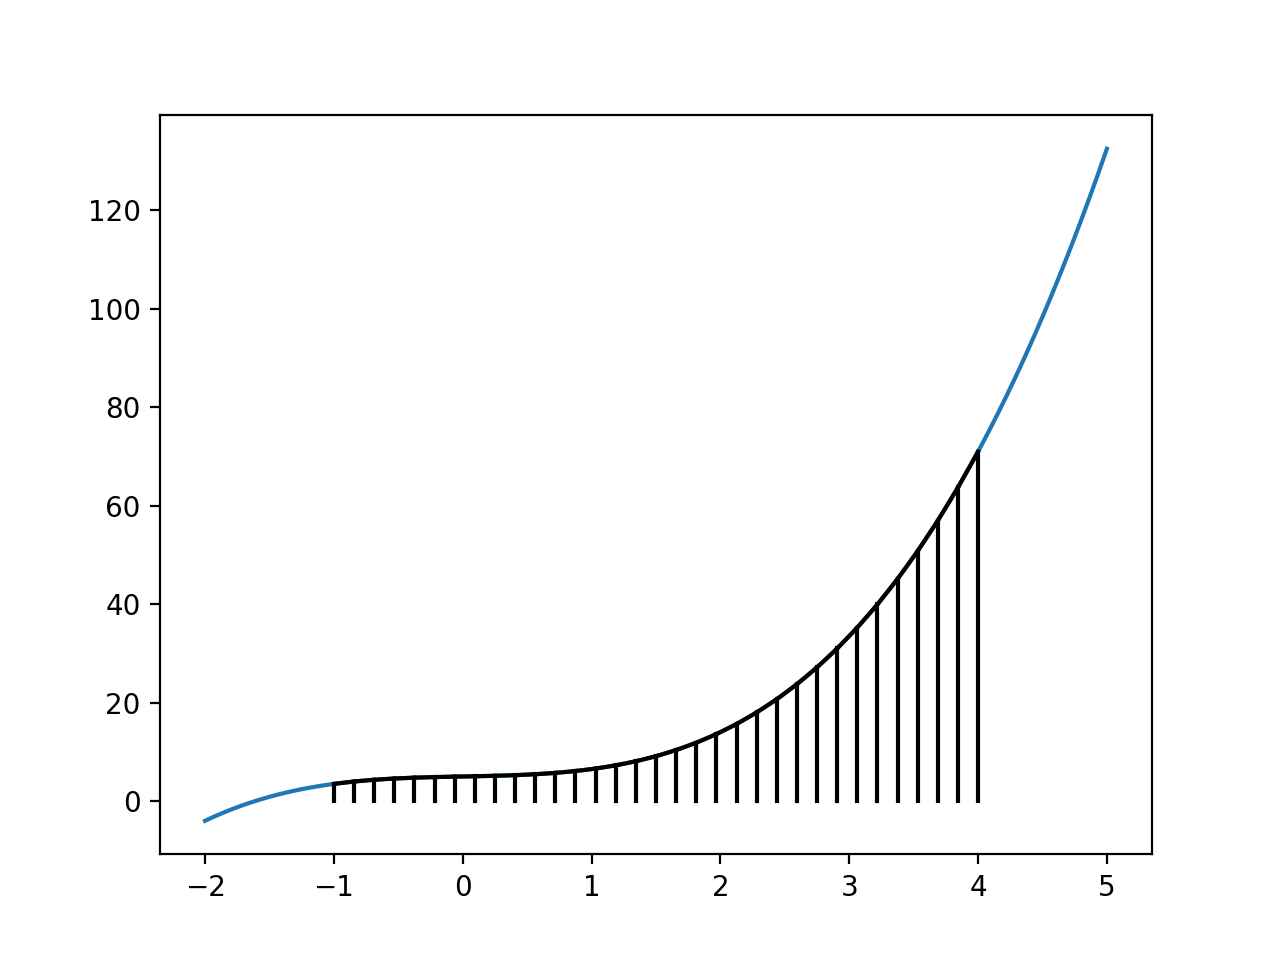

IntSlider(value=3, description='N', max=32, min=3)

Label(value='Approximate integral: 77.292')

Label(value='Absolute error: 75.292')

In [15]:
%matplotlib notebook

import matplotlib.pyplot as plt
import ipywidgets as widgets

a = -1
b = 4

approx = integrate_trapezoidal_rule(f, a, b, 3)

slider = widgets.IntSlider(value=3, min=3, max=64, description='N')
approx_label = widgets.Label('Approximate integral: %.3f' % approx)
error_label = widgets.Label('Absolute error: %.3f' % np.abs(2 - approx))

fig, ax = plt.subplots()

xs = np.linspace(-2, 5, 100)

function, = ax.plot(xs, f(xs))
n = slider.value

intervals = np.linspace(a, b, slider.value+1)
vlines, = ax.plot([0], [0], color='black')

for i in range(n+1):
    if i < n:
        ax.plot([intervals[i], intervals[i+1]], [f(intervals[i]), f(intervals[i+1])], color='black')
    ax.plot([intervals[i], intervals[i]], [0, f(intervals[i])], color='black')
        
    fig.canvas.draw_idle()


def update(change):
    ax.clear()
    ax.plot(xs, f(xs))
    n = slider.value
    intervals = np.linspace(a, b, n+1)
    for i in range(n+1):
        if i < n:
            ax.plot([intervals[i], intervals[i+1]], [f(intervals[i]), f(intervals[i+1])], color='black')
        ax.plot([intervals[i], intervals[i]], [0, f(intervals[i])], color='black')
        
    fig.canvas.draw_idle()
    
    approx = integrate_trapezoidal_rule(f, a, b, n)
    approx_label.value = 'Approximate integral: %.3f' % approx
    error_label.value = 'Absolute error: %.3f' % np.abs(92.5 - approx)

        
slider.observe(update)
display(slider)
display(approx_label)
display(error_label)

## Monte Carlo Integration

$$ \hat I = c(b-a) \cdot \frac{1}{N} \sum_{i=1}^N b_i $$
$$ b_i = \cases{0, y_i > f(x_i) \\ 1, y_i \leq f(x_i)} $$
$$ a = \textrm{lower bound of integration},\ b = \textrm{upper bound of integration},\ c = \max_{a\leq x \leq b}f(x) $$


(from *Math, Numerics, & Programming for Mechanical Engineers . . . in a Nutshell* by AT Patera and M Yano)

In [9]:
def integrate_monte_carlo(f, a, b, n):
    xs = np.linspace(a, b, 1000) # points to evaluate f at to approximate maximum
    rect_height = np.max(f(xs))
    rect_area = rect_height * (b - a)
    
    samples = np.vstack((np.random.uniform(a, b, n),
                         np.random.uniform(0, rect_height, n)))
    
    # separate samples below and above f
    below_f = samples[:, samples[1] < f(samples[0])]
    above_f = samples[:, samples[1] >= f(samples[0])]
    
    # approximate the integral
    approx = below_f.shape[1] / n * rect_area
    
    return below_f, above_f, approx

<IPython.core.display.Javascript object>


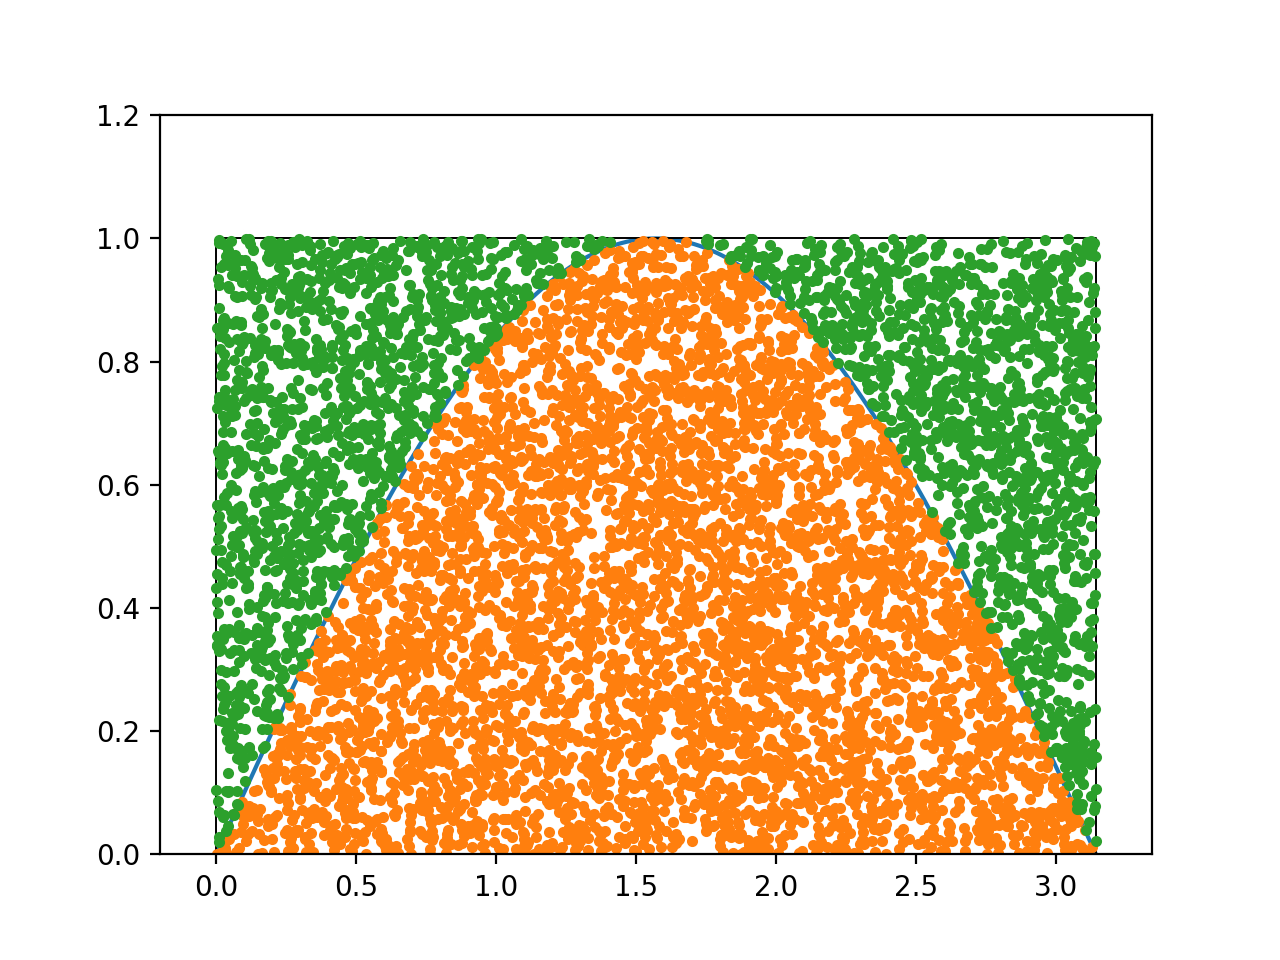

IntSlider(value=10, description='N', max=10000, min=10)

Label(value='Approximate integral: 2.199')

Label(value='Absolute error: 0.199')

In [10]:
slider = widgets.IntSlider(value=10, min=10, max=10000, description='N')

a = 0
b = np.pi

above, below, approx = integrate_monte_carlo(np.sin, 0, np.pi, slider.value)

approx_label = widgets.Label('Approximate integral: %.3f' % approx)
error_label = widgets.Label('Absolute error: %.3f' % np.abs(2 - approx))
    
xs = np.linspace(-5, 5, 1000)
fig, ax = plt.subplots()
ax.plot(xs, np.sin(xs))

ax.plot([a, a, b, b, a, a], [0, 1, 1, 0, 0, 0], color='black', linewidth=0.7)

above_points, = ax.plot(above[0], above[1], '.')
below_points, = ax.plot(below[0], below[1], '.')

plt.xlim(-1/5, np.pi + 1/5)
plt.ylim(0, 6/5)

def update(change):
    n = slider.value
    
    above, below, approx = integrate_monte_carlo(np.sin, 0, np.pi, n)

    above_points.set_data(above[0], above[1])
    below_points.set_data(below[0], below[1])
    
    approx_label.value = 'Approximate integral: %.3f' % approx
    error_label.value = 'Absolute error: %.3f' % np.abs(2 - approx)
    
    fig.canvas.draw_idle()
        
slider.observe(update)
display(slider)
display(approx_label)
display(error_label)